# DATA VISUALISATION

Let's start with the assumption that we don't know much about anime and we apologize for any false observations we might make.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

In [4]:
# I don't know if we have to read all dataset also in this file or we can import from the data cleaning file
# da passare dataset già puliti
anime_details_df = pd.read_csv('datasets/details.csv')
profiles_df = pd.read_csv('datasets/profiles.csv')
ratings_df = pd.read_csv('datasets/ratings.csv')

In [3]:
profiles_df

,username,gender,birthday,location,joined,watching,completed,on_hold,dropped,plan_to_watch
0,ishikawas,NaN,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,NaN
1,CKK2,NaN,NaN,United States,"Dec 1, 2018",3,182,15,0,405
2,--------788,Female,NaN,Mexico,"Oct 4, 2022",1,64,0,0,1
3,potatoaris,NaN,NaN,Spain,"Oct 2, 2018",5,1,0,0,4
4,Rinrintan,NaN,NaN,Japan,"May 12, 2019",20,311,40,16,34
...,...,...,...,...,...,...,...,...,...,...
337150,ariyanroy04,NaN,NaN,United States,"Mar 30, 2021",35,130,0,0,489
337151,ariyanvk18,Male,NaN,Turkey,"Jan 24, 2022",7,101,1,12,21
337152,ariyoskz,NaN,NaN,Germany,"Jul 7, 2022",1,155,2,11,15
337153,arizima23,Female,"Jun 23, 1998",Spain,"Mar 15, 2019",15,64,0,4,4


In [4]:
ratings_df

,username,anime_id,status,score,is_rewatching,num_watched_episodes
0,--------788,30276,watching,7,0.0,3
1,--------788,28851,completed,7,0.0,1
2,--------788,41168,completed,7,0.0,1
3,--------788,22199,completed,10,0.0,24
4,--------788,16498,completed,10,0.0,25
...,...,...,...,...,...,...
124298352,arizkim,52305,plan_to_watch,0,0.0,0
124298353,arizkim,4224,plan_to_watch,0,0.0,0
124298354,arizkim,54790,plan_to_watch,0,0.0,0
124298355,arizkim,53835,plan_to_watch,0,0.0,0


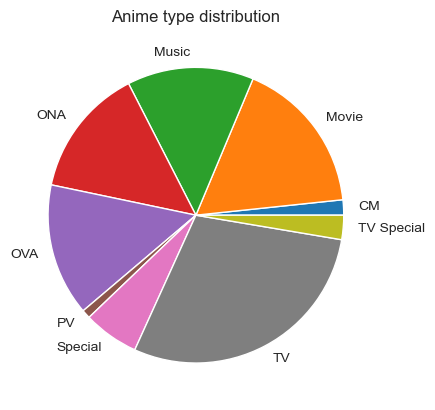

In [5]:
# In the first moment we see the type of anime to analyse how are distributed, to do this we use the easier graph that we know, pie chart
details_type = anime_details_df.groupby("type").size()
details_type.plot(kind='pie')
plt.title('Anime type distribution')
plt.show()


Just an example of graph to see how they look, other example that we can develop are:

### For the first dataset we can have:
     - questo sopra è il grafico di dove è uscito l'anime (tv, cinema, internet...), possiamo analizzare se c'è qualche correlazione con il tema/genere   dell'anime (non ho capito differenza tra tema/genere).
     - vedere come si sono svillupati negli anni, quindi fare un grafico con "start-date" e "type" per vedere come internet ha infuenzato gli la visione  degli anime.
     - non ho ben capito cosa sia end-date (che non sono piu presenti su internet questi anime??)

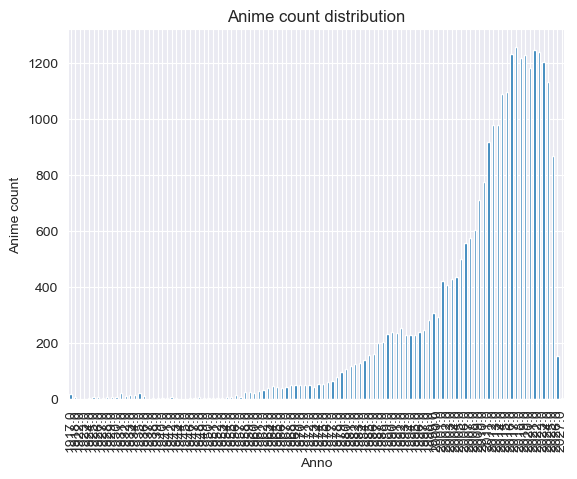

In [6]:
# da togliere quando passiamo dataset gia puliti
anime_details_df["start_date"] = pd.to_datetime(anime_details_df["start_date"], errors='coerce')

anime_counts = anime_details_df["start_date"].dt.year.value_counts().sort_index()

anime_counts.plot(kind='bar')
plt.title('Anime count distribution')
plt.xlabel("Anno")
plt.ylabel("Anime count")
 
plt.show()

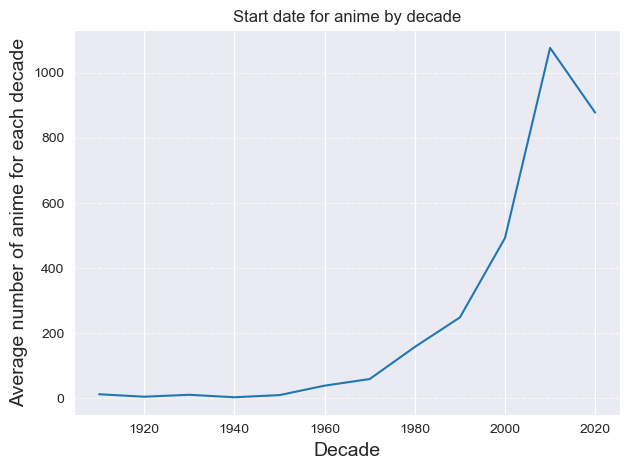

In [7]:
# to represent decade
anime_details_df["decade"] = ((anime_details_df["start_date"].dt.year // 10) * 10).astype("Int64")
film_counts_by_decade = anime_details_df["decade"].value_counts().sort_index()


# take only the years that are present to compose the decade
years_per_decade = (anime_details_df["start_date"].dt.year.groupby(anime_details_df["decade"]).nunique())

adjusted_counts = film_counts_by_decade / years_per_decade

# Plot di film_counts_by_decade
plt.plot(adjusted_counts.index, adjusted_counts.values)

plt.title("Start date for anime by decade")
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Average number of anime for each decade", fontsize=14)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Vediamo il boom che c'è agli inizi del 2000 e per spiegare questo picco possiamo generare un grafico che ci faccia vedere i valori degli anime usciti negli anni tramite il tipo

In [8]:
anime_details_df.dtypes

mal_id                           int64
title                           object
title_japanese                  object
url                             object
image_url                       object
type                            object
status                          object
score                          float64
scored_by                      float64
start_date         datetime64[ns, UTC]
end_date                        object
synopsis                        object
rank                           float64
popularity                       int64
members                          int64
favorites                        int64
genres                          object
studios                         object
themes                          object
demographics                    object
source                          object
rating                          object
episodes                       float64
season                          object
year                           float64
producers                

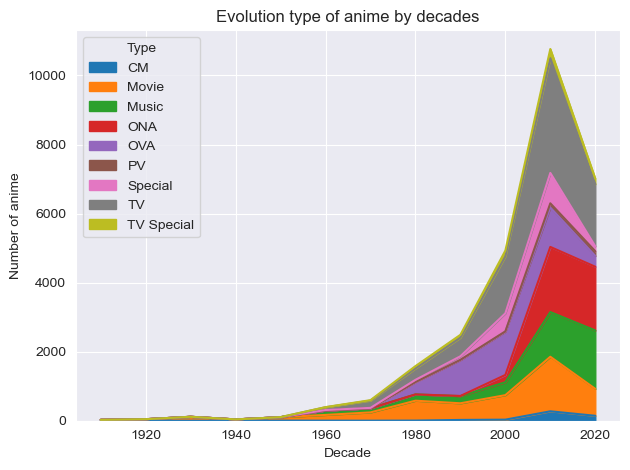

In [9]:
type_by_decade = anime_details_df.pivot_table(
    index="decade",       # rows = decadi
    columns="type",      # columns = type
    values="title",      
    aggfunc="count",
    fill_value=0
)

type_by_decade.plot(kind="area")

plt.title("Evolution type of anime by decades")
plt.xlabel("Decade")
plt.ylabel("Number of anime")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

Il grafico mostra chiaramente che il picco di anime negli anni duemila è dovuto principalmente alla televisione, che in quel periodo registrò un aumento significativo di reti e canali. Questo incremento riguardò sia le serie regolari sia i “TV Special”, cioè episodi singoli non appartenenti a serie continuative. Nel decennio 2000–2010, il numero di anime prodotti raggiunse livelli mai osservati prima e, successivamente, non venne più superato

In [10]:
anime_details_df["start_date"].dt.year.value_counts().sort_index()

start_date
1917.0      17
1918.0       9
1922.0       1
1923.0       1
1924.0       5
          ... 
2023.0    1203
2024.0    1131
2025.0     867
2026.0     154
2027.0       3
Name: count, Length: 108, dtype: int64

GENRES ANALYSIS

In [11]:
# check type of genres rows to do explode 
type(anime_details_df["genres"].iloc[0])

str

In [12]:
# to list from string
anime_details_df["genres"] = anime_details_df["genres"].apply(ast.literal_eval)
anime_details_df["demographics"] = anime_details_df["demographics"].apply(ast.literal_eval)


df_vis = anime_details_df.explode('genres').explode('demographics')
genres_counts = df_vis["genres"].value_counts().sort_index()

In primis vediamo come sono divisi i ventuno generi che sono presenti per capire a livello visivo i top generi di anime prodotti come punti successivi vedremo una visualizzazione dei generi come si sono svillupati negli anni e provare a capire se avvenimenti storici possano aver influenzato la crescita 

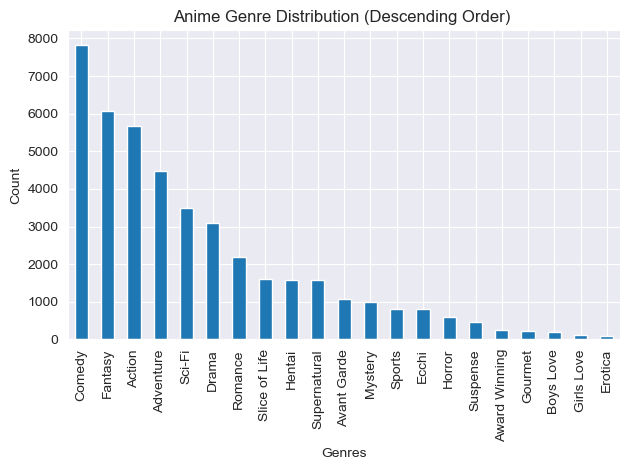

In [13]:
genres_counts.sort_values(ascending=False).plot(kind="bar")

plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Anime Genre Distribution (Descending Order) ")
plt.tight_layout()
plt.show()

Dopo aver visualizzato in modo decrescente i generi più presenti il prossimo grafico analizzerà tre variabili assieme che saranno il tipo di genere, il tempo (in decadi) e la quantità di questo genere (inteso come quanti anime con questo genere sono presenti).

In [14]:
anime_details_df.columns

Index(['mal_id', 'title', 'title_japanese', 'url', 'image_url', 'type',
       'status', 'score', 'scored_by', 'start_date', 'end_date', 'synopsis',
       'rank', 'popularity', 'members', 'favorites', 'genres', 'studios',
       'themes', 'demographics', 'source', 'rating', 'episodes', 'season',
       'year', 'producers', 'explicit_genres', 'licensors', 'streaming',
       'decade'],
      dtype='object')

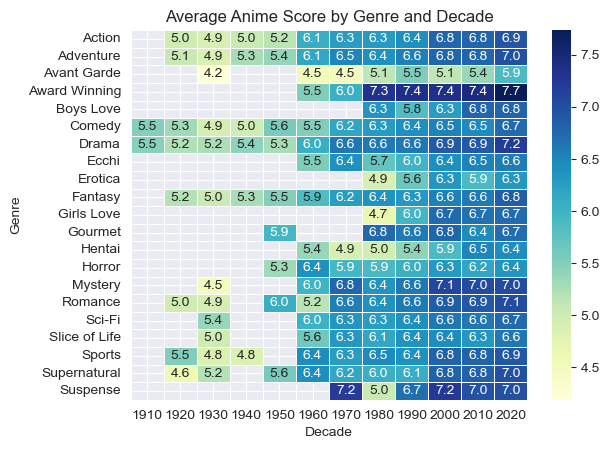

In [15]:
# Pivot table: Index=Genres, Columns=Decade, Values=Mean Score
heatmap_data = df_vis.pivot_table(index='genres', columns='decade', values='score', aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Average Anime Score by Genre and Decade")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.show()

Da questo grafico vediamo che in ogni genere che prendiamo, dei 21 generi presenti, piu andiamo avanti nel tempo più lo score quindi il voto del pubblico è piu alto, vediamo di trovare delle correlazioni nelle prossime visualizzazioni. Nel prossimo grafico vogliamo vedere in base all'età i generi più visti oppure sempre in base all'età possiamo vedere il voto medio dato. Altra idea carina è vedere com'è cambiato il pubblico se prima gli anime era una cosa piu per bambini/ragazzi mentre adesso si è diffusa anche negli adulti.

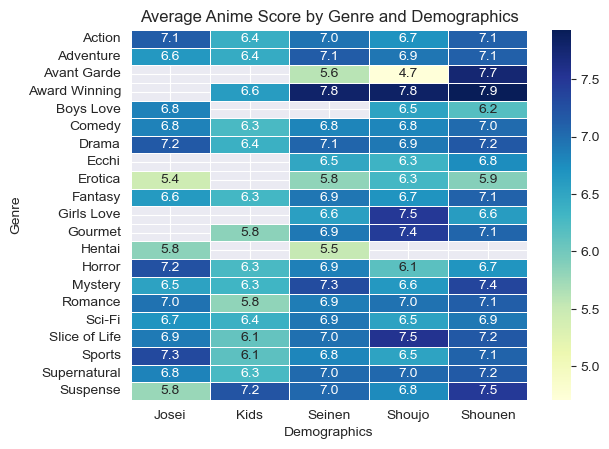

In [16]:
# Pivot table: Index=Genres, Columns=Decade, Values=Mean Score
heatmap_data = df_vis.pivot_table(index='genres', columns='demographics', values='score', aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Average Anime Score by Genre and Demographics")
plt.xlabel("Demographics")
plt.ylabel("Genre")
plt.show()

In [17]:
profiles_df.describe()

,username,gender,birthday,location,joined,watching,completed,on_hold,dropped,plan_to_watch
count,337154,166279,121329,337155,335479,335477,335477,335477,335477,335477
unique,337154,3,11344,22,6802,942,3380,738,900,2538
top,ishikawas,Male,2003,Japan,"Sep 30, 2025",0,0,0,0,0
freq,1,120747,448,98316,665,38109,15197,122275,108914,41186


Avremmo voluto analizzare il pubblico in base al genere (maschio/femmina) per osservare eventuali cambiamenti nel tempo, ma poiché oltre il 50% dei dati è mancante (NaN), un’analisi del genere non sarebbe realistica. Lo stesso problema si presenta per la data di nascita, presente solo per circa il 35% dei casi: una percentuale troppo bassa per fornire risultati attendibili.

Invece, la colonna data di iscrizione (date joined) è presente per il 95% dei casi, quindi possiamo utilizzarla per condurre alcune analisi interessanti. Ad esempio, potremmo osservare come il pubblico si è interfacciato con la piattaforma nel tempo, creando un grafico che mostri l’andamento delle iscrizioni. Questo ci permetterà di capire se la maggior parte dei dati proviene da utenti più recenti o da utenti più vecchi.

Inoltre, potremmo utilizzare questa colonna per analizzare come i gusti degli utenti cambiano in base al periodo di ingresso nella piattaforma, evidenziando eventuali differenze tra chi si è iscritto prima e chi più recentemente.

In [18]:
profiles_df.dtypes

username         object
gender           object
birthday         object
location         object
joined           object
watching         object
completed        object
on_hold          object
dropped          object
plan_to_watch    object
dtype: object

In [19]:
# Convertiamo la colonna in datetime ()
profiles_df['joined'] = pd.to_datetime(profiles_df['joined'], errors='coerce')

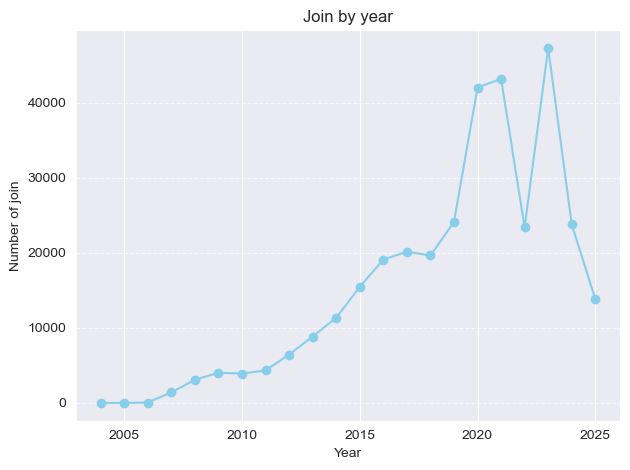

In [20]:
# Estraiamo l'anno di iscrizione
profiles_df['joined_year'] = profiles_df['joined'].dt.year

# Contiamo quante iscrizioni ci sono per ogni anno
joined_per_year = profiles_df.groupby('joined_year').size()

plt.plot(joined_per_year.index, joined_per_year.values, marker='o', color="skyblue")

plt.title("Join by year")
plt.xlabel("Year")
plt.ylabel("Number of join")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
anno_minimo = profiles_df['joined'].min()
anno_minimo

Timestamp('2004-11-05 00:00:00')

In [22]:
profiles_df['year_month'] = profiles_df['joined'].dt.to_period('M')

profiles_df[
    profiles_df['joined'].dt.year == 2022
]['year_month'].value_counts().sort_index()

year_month
2022-01    2648
2022-02    1998
2022-03    2086
2022-04    2284
2022-05    1872
2022-06    1887
2022-07    2010
2022-08    1693
2022-09    1554
2022-10    1681
2022-11    1437
2022-12    2225
Freq: M, Name: count, dtype: int64

In [23]:
profiles_df[
    profiles_df['joined'].dt.year == 2023
]['year_month'].value_counts().sort_index()

year_month
2023-01    1823
2023-02    1273
2023-03    1590
2023-04    1858
2023-05    1363
2023-06    1522
2023-07    4381
2023-08    6825
2023-09    7452
2023-10    7187
2023-11    6143
2023-12    5854
Freq: M, Name: count, dtype: int64

Da questo grafico osserviamo una crescita complessivamente abbastanza lineare delle iscrizioni a MyAnimeList a partire dal 2004, anno di apertura della piattaforma, fino a oggi.
L’unica evidente anomalia si registra nel 2022, anno in cui il numero di iscrizioni risulta circa la metà rispetto agli anni adiacenti. Non emergono motivazioni storiche o eventi specifici legati alla piattaforma che possano giustificare un calo così marcato.

Un possibile elemento interpretativo è il periodo di lockdown: nel 2020 si osserva infatti un’impennata delle iscrizioni rispetto al trend di crescita lineare, probabilmente dovuta all’aumento del tempo trascorso online e al maggiore consumo di contenuti di intrattenimento. Con la fine del lockdown, nel 2022, il numero di iscrizioni sembra tornare su valori più regolari, sebbene il calo osservato appaia comunque troppo accentuato e suggerisca anche la presenza di un possibile bias nei dati.

Il 2023 rappresenta invece un anno di forte crescita, con un vero e proprio boom di iscrizioni, mentre nel 2024 e nel 2025 il trend torna a essere coerente con la crescita osservata negli anni precedenti. Va inoltre sottolineato che i dati relativi al 2025 sono parziali e quindi non completamente confrontabili con gli anni precedenti.

Infine, l’aumento particolarmente marcato a partire da luglio 2023 può essere in parte spiegato dall’uscita di anime molto attesi e particolarmente popolari in quel periodo. Dalle ricerche effettuate, risulta plausibile che questi eventi abbiano contribuito ad attirare nuovi utenti sulla piattaforma, incentivando le iscrizioni e l’attività su MyAnimeList.

In [24]:
ratings_df['status'].value_counts()

status
completed        79138385
plan_to_watch    31631312
watching          5678167
dropped           4580651
on_hold           3253152
unknown             16690
Name: count, dtype: int64

Per fare l'analisi prenderemo in considerazione solo i ratings con status "completed" dato che i ratings proventienti dalle altre voci non sono affidabili per motivi come giudizio influenzato da abbandono, nessuna visione oppure giudizio parziale.

In [25]:
# Selezioniamo solo le colonne di interesse e filtriamo per completed
completed_df = ratings_df[ratings_df['status'] == 'completed'][['username', 'anime_id', 'score']].copy()

# Aggiungiamo la colonna date_joined dal dataset users
completed_df = completed_df.merge(
    profiles_df[['username', 'joined']],
    on='username',
    how='left'  # left join mantiene solo le righe già filtrate in ratings
)

In [26]:
completed_df

,username,anime_id,score,joined
0,--------788,28851,7,2022-10-04
1,--------788,41168,7,2022-10-04
2,--------788,22199,10,2022-10-04
3,--------788,16498,10,2022-10-04
4,--------788,25777,10,2022-10-04
...,...,...,...,...
79138380,arizkim,40356,5,2020-12-07
79138381,arizkim,38826,10,2020-12-07
79138382,arizkim,35968,10,2020-12-07
79138383,arizkim,25013,9,2020-12-07


Adesso che abbiamo creato il dataframe con solo i dati che ci servono possiamo fare il grafico 

In [27]:
# Convertiamo 'joined' in datetime
completed_df['joined'] = pd.to_datetime(completed_df['joined'], errors='coerce')

# Estraiamo l'anno di iscrizione
completed_df['join_year'] = completed_df['joined'].dt.year

In [28]:
completed_df

,username,anime_id,score,joined,join_year
0,--------788,28851,7,2022-10-04,2022.0
1,--------788,41168,7,2022-10-04,2022.0
2,--------788,22199,10,2022-10-04,2022.0
3,--------788,16498,10,2022-10-04,2022.0
4,--------788,25777,10,2022-10-04,2022.0
...,...,...,...,...,...
79138380,arizkim,40356,5,2020-12-07,2020.0
79138381,arizkim,38826,10,2020-12-07,2020.0
79138382,arizkim,35968,10,2020-12-07,2020.0
79138383,arizkim,25013,9,2020-12-07,2020.0


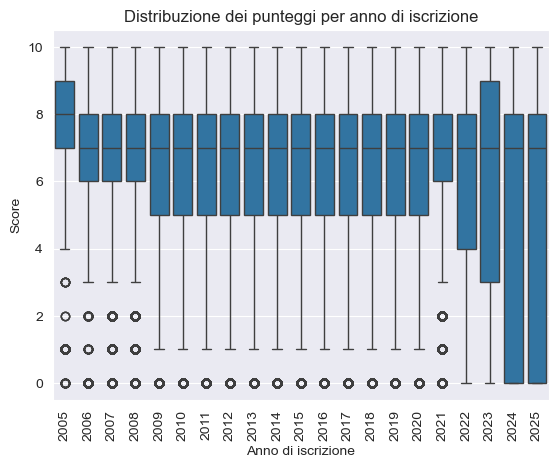

In [33]:
# Selezioniamo solo le colonne di interesse e filtriamo per completed
completed_df = ratings_df[ratings_df['status'] == 'completed'][['username', 'anime_id', 'score']].copy()

# Aggiungiamo la colonna date_joined dal dataset users
completed_df = completed_df.merge(
    profiles_df[['username', 'joined']],
    on='username',
    how='left'  # left join mantiene solo le righe già filtrate in ratings
)

# Convertiamo 'joined' in datetime
completed_df['joined'] = pd.to_datetime(completed_df['joined'], errors='coerce')

# Estraiamo l'anno di iscrizione
completed_df['join_year'] = completed_df['joined'].dt.year

# Rimuoviamo le righe con NaN in join_year o score
# controllare se è giusto fare cosi o no
completed_df = completed_df.dropna(subset=['join_year', 'score'])

# Convertiamo join_year in int classico
completed_df['join_year'] = completed_df['join_year'].astype(int)

# Boxplot
# mettere apposto l'asse x per avere gli anni in verticale
sns.boxplot(x='join_year', y='score', data=completed_df)
plt.title("Distribuzione dei punteggi per anno di iscrizione")
plt.xlabel("Anno di iscrizione")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()

In [30]:
# Filtra per anno 2024
df_2024 = completed_df[completed_df['join_year'] == 200]

# Conta quanti rating sono 0
num_zero_ratings = (df_2024['score'] == 0).sum()

In [31]:
num_zero_ratings

0

Da questo grafico vediamo come gli utenti iscritti nei primi anni della piattaforma mostrano una tendenza a dare voti significativamente più alti. La mediana si attesta sull'8 e i voti sotto il 4 sono considerati anomalie rarissime (outlier). Per oltre un decennio, il comportamento della community è rimasto estremamente stabile. Il "cuore" delle valutazioni si è concentrato tra il 5 e l'8, con una mediana fissa al 7. In questo periodo, i voti estremamente bassi (0-2) esistevano ma erano staccati dal corpo principale del grafico (i baffi), indicando che il disprezzo totale per un'opera erano fenomeni marginali e non sistematici. Il dato più critico emerge negli ultimi tre anni, dove assistiamo a una frammentazione del voto con le scatole che si allungano verso il basso, segno che i nuovi iscritti usano l'intera scala dei voti senza riserve. Negli iscritti del 2024 e 2025, lo zero non è più un cerchietto isolato ma fa parte della scatola o del baffo principale. Questo indica che i nuovi utenti sono molto più propensi a dare voti estremi.

### For the second dataset we can have:
    - il secondo dataset contiene solo 4 valori possibili possiamo visualizzare i valori tramite un grafico di quantità (non ho capito cosa siano anime, character, people, company) 
    - trovare correlazione dopo aver capito cosa sono
   

### For the third dataset we can have:
    - potremmo fare un grafico per visualizzare i primi 10 "person" che hanno più nomi alternativi (saltabile, molto inutile)
    - dataset molto inutile

Controllare la correlazione tra numero di nomi alternativi e genere, con genere normalizzato (se il dataset contiene il 90% di uomini, allora se le prime due sono donne hanno molta più importanza)
    

### For the fourth dataset we can have:
    - controllare la correlazione tra attore singolo e cambio di genere negli anni
    - vedere la distribuzione degli anni in cui ogni attore ha lavorato di pù (e.g. attori che hanno lavorato di pù negli anni 2000 vs attori che hanno lavorato di pù negli anni 2010)
GRAFICO INTERATTIVO per cui per ogni anno abbiamo un istogramma con il numero di anime prodotti in quell'anno per ogni attore

Range di attori che hanno tra i 50 e i 70 anni e fare un grafico in cui vediamo come hanno cambiato genere negli anni (bin di 10 anni)



possiamo guardare se c'è una correlazione tra gli anime interrotti e il loro livello di apprezzamento basso

In [34]:
ratings_df['status'].value_counts()

status
completed        79138385
plan_to_watch    31631312
watching          5678167
dropped           4580651
on_hold           3253152
unknown             16690
Name: count, dtype: int64

In [5]:
ratings_cd_df = ratings_df[ratings_df['status'].isin(['completed', 'dropped'])].copy()

In [6]:
ratings_cd_df = ratings_cd_df.rename(columns={'anime_id': 'mal_id'})

In [7]:
ratings_cd_df = ratings_cd_df.merge(
    anime_details_df[['mal_id', 'rank']],
    on='mal_id',
    how='left'
)

In [43]:
ratings_cd_df

,username,mal_id,status,score,is_rewatching,num_watched_episodes,rank
0,--------788,28851,completed,7,0.0,1,19.0
1,--------788,41168,completed,7,0.0,1,2645.0
2,--------788,22199,completed,10,0.0,24,2088.0
3,--------788,16498,completed,10,0.0,25,118.0
4,--------788,25777,completed,10,0.0,12,136.0
...,...,...,...,...,...,...,...
83719031,arizkim,40356,completed,5,0.0,13,7045.0
83719032,arizkim,38826,completed,10,0.0,1,325.0
83719033,arizkim,35968,completed,10,0.0,11,826.0
83719034,arizkim,25013,completed,9,0.0,24,651.0


In [8]:
ratings_cd_df = ratings_cd_df.dropna(subset=['rank', 'score'])

ratings_cd_df = ratings_cd_df.sort_values('rank')

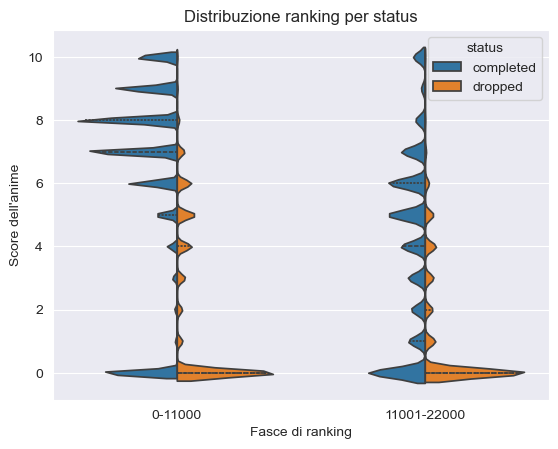

In [9]:
# Creiamo la colonna dei bin
ratings_cd_df['rank_bin'] = pd.cut(
    ratings_cd_df['rank'],
    bins=[0, 11000, 22000],
    labels=['0-11000', '11001-22000']
)

# Violin plot
sns.violinplot(
    x='rank_bin',
    y='score',      # o score se vuoi vedere il punteggio medio
    hue='status',
    data=ratings_cd_df,
    split=True,
    inner='quartile'
)

plt.title("Distribuzione ranking per status")
plt.xlabel("Fasce di ranking")
plt.ylabel("Score dell'anime")
plt.show()

In [36]:
ratings_cd_df

,username,anime_id,status,score,is_rewatching,num_watched_episodes
1,--------788,28851,completed,7,0.0,1
2,--------788,41168,completed,7,0.0,1
3,--------788,22199,completed,10,0.0,24
4,--------788,16498,completed,10,0.0,25
5,--------788,25777,completed,10,0.0,12
...,...,...,...,...,...,...
124298318,arizkim,40356,completed,5,0.0,13
124298319,arizkim,38826,completed,10,0.0,1
124298320,arizkim,35968,completed,10,0.0,11
124298321,arizkim,25013,completed,9,0.0,24


possiamo guardare se il genere "award winning" ha un livello medio di score più alto